In [2]:
import pandas as pd 
import numpy as np 
import yfinance as yf

#monthly - from 1991
housing_df = pd.read_csv('HPI_master.csv')
housing_df = housing_df[housing_df['level'].str.lower().str.contains('usa')]
housing_df = housing_df[housing_df['place_name'] == 'United States']
housing_df = housing_df[housing_df['frequency'] == 'monthly']
housing_df = housing_df.drop('index_nsa', axis=1)
housing_df = housing_df.reset_index(drop=True)
housing_df['Date'] = pd.to_datetime(housing_df['yr'].astype(str) + '-' + housing_df['period'].astype(str), format='%Y-%m')
housing_df = housing_df.loc[housing_df['Date'] >= '11/01/1998']

# Drop the original 'Year' and 'Month' columns if needed
final_housing_df = housing_df.drop(['yr', 'period'], axis=1)
final_housing_df = housing_df[['Date', 'index_sa']]
final_housing_df = final_housing_df.reset_index(drop=True)

final_housing_df

,Date,index_sa
0,1998-11-01,127.11
1,1998-12-01,127.68
2,1999-01-01,128.41
3,1999-02-01,128.93
4,1999-03-01,129.51
...,...,...
295,2023-06-01,405.84
296,2023-07-01,409.17
297,2023-08-01,412.13
298,2023-09-01,414.94


In [5]:
# Assuming the current date is 2024-01-03
end_date = pd.to_datetime("2023-12-31")

# Generate the date range from January 1998 to the present
date_range = pd.date_range(start="1998-01-01", end=end_date, freq="MS")

# Extract month-year combinations with numeric months
month_year_combinations = date_range.strftime('%m-%Y')

data_list = [
    2.2, 2.3, 2.1, 2.1, 2.2, 2.2, 2.2, 2.5, 2.5, 2.3, 2.3, 2.4, 
    2.4, 2.1, 2.1, 2.2, 2.0, 2.1, 2.1, 1.9, 2.0, 2.1, 2.1, 1.9, 
    2.0, 2.2, 2.4, 2.3, 2.4, 2.5, 2.5, 2.6, 2.6, 2.5, 2.6, 2.6, 
    2.6, 2.7, 2.7, 2.6, 2.5, 2.7, 2.7, 2.7, 2.6, 2.6, 2.8, 2.7, 
    2.6, 2.6, 2.4, 2.5, 2.5, 2.3, 2.2, 2.4, 2.2, 2.2, 2.0, 1.9, 
    1.9, 1.7, 1.7, 1.5, 1.6, 1.5, 1.5, 1.3, 1.2, 1.3, 1.1, 1.1, 
    1.1, 1.2, 1.6, 1.8, 1.7, 1.9, 1.8, 1.7, 2.0, 2.0, 2.2, 2.2,
    2.3, 2.4, 2.3, 2.2, 2.2, 2.0, 2.1, 2.1, 2.0, 2.1, 2.1, 2.2,
    2.1, 2.1, 2.1, 2.3, 2.4, 2.6, 2.7, 2.8, 2.9, 2.7, 2.6, 2.6,
    2.7, 2.7, 2.5, 2.3, 2.2, 2.2, 2.2, 2.1, 2.1, 2.2, 2.3, 2.4,
    2.5, 2.3, 2.4, 2.3, 2.3, 2.4, 2.5, 2.5, 2.5, 2.2, 2.0, 1.8,
    1.7, 1.8, 1.8, 1.9, 1.8, 1.7, 1.5, 1.4, 1.5, 1.7, 1.7, 1.8,
    1.6, 1.3, 1.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8, 0.6, 0.8, 0.8,
    1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 1.8, 2.0, 2.0, 2.1, 2.2, 2.2,
    2.3, 2.2, 2.3, 2.3, 2.3, 2.2, 2.1, 1.9, 2.0, 2.0, 1.9, 1.9,
    1.9, 2.0, 1.9, 1.7, 1.7, 1.6, 1.7, 1.8, 1.7, 1.7, 1.7, 1.7,
    1.6, 1.6, 1.7, 1.8, 2.0, 1.9, 1.9, 1.7, 1.7, 1.8, 1.7, 1.6,
    1.6, 1.7, 1.8, 1.8, 1.7, 1.8, 1.8, 1.8, 1.9, 1.9, 2.0, 2.1,
    2.2, 2.3, 2.2, 2.1, 2.2, 2.2, 2.2, 2.3, 2.2, 2.1, 2.1, 2.2,
    2.3, 2.2, 2.0, 1.9, 1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.7, 1.8,
    1.8, 1.8, 2.1, 2.1, 2.2, 2.3, 2.4, 2.2, 2.2, 2.1, 2.2, 2.2,
    2.2, 2.1, 2.0, 2.1, 2.0, 2.1, 2.2, 2.4, 2.4, 2.3, 2.3, 2.3,
    2.3, 2.4, 2.1, 1.4, 1.2, 1.2, 1.6, 1.7, 1.7, 1.6, 1.6, 1.6,
    1.4, 1.3, 1.6, 3.0, 3.8, 4.5, 4.3, 4.0, 4.0, 4.6, 4.9, 5.5,
    6.0, 6.4, 6.5, 6.2, 6.0, 5.9, 5.9, 6.3, 6.6, 6.3, 6.0, 5.7,
    5.6, 5.5, 5.6, 5.5, 5.3, 4.8, 4.7, 4.3, 4.1, 4.0, 4.0, 0.0
]

# Now, you can use the data_list as needed.
inflation_df = pd.DataFrame({'Date': month_year_combinations, 'Inflation': data_list})

In [6]:
# Define the ticker symbol for VIX
ticker_symbol = "^VIX"

# Define the start and end dates for the data
start_date = "1998-11-30"
end_date = "2024-01-10"  # You can adjust the end date as needed

# Download the data
vix_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1wk")
vix_data = vix_data[['Open','Close']]
vix_data = vix_data.reset_index()

vix_data['Date'] = pd.to_datetime(vix_data['Date'])
vix_data = vix_data.rename(columns= {'Open': 'Vix Open','Close': 'Vix Close'})
# Print the first few rows of the data
print(vix_data)

[*********************100%%**********************]  1 of 1 completed
           Date   Vix Open  Vix Close
0    1998-11-30  22.790001  25.309999
1    1998-12-07  25.590000  27.719999
2    1998-12-14  29.860001  25.040001
3    1998-12-21  24.639999  21.480000
4    1998-12-28  22.920000  24.420000
...         ...        ...        ...
1306 2023-12-11  13.050000  12.280000
1307 2023-12-18  12.620000  13.030000
1308 2023-12-25  13.770000  12.450000
1309 2024-01-01  13.220000  13.350000
1310 2024-01-08  14.000000  12.690000

[1311 rows x 3 columns]


In [7]:
inflation_df['Date'] = pd.to_datetime(inflation_df['Date'])
final_housing_df['Date'] = pd.to_datetime(final_housing_df['Date'])

# Merge DataFrames based on the 'Date' column
merged_df = pd.merge(inflation_df, final_housing_df, on='Date')

# Display the merged DataFrame
print(merged_df)

          Date  Inflation  index_sa
0   1998-11-01        2.3    127.11
1   1998-12-01        2.4    127.68
2   1999-01-01        2.4    128.41
3   1999-02-01        2.1    128.93
4   1999-03-01        2.1    129.51
..         ...        ...       ...
295 2023-06-01        4.8    405.84
296 2023-07-01        4.7    409.17
297 2023-08-01        4.3    412.13
298 2023-09-01        4.1    414.94
299 2023-10-01        4.0    416.26

[300 rows x 3 columns]


In [8]:
#weekly from 1990 
ten_year_yield_df = pd.read_csv('10-year-yield.csv')
yield_df = ten_year_yield_df.iloc[::-1]
yield_df = yield_df.reset_index(drop=True)
yield_df['Date'] = pd.to_datetime(yield_df['Date'])
yield_after1998_df = yield_df.loc[yield_df['Date'] >= '11/24/1998']
new_yield_df = yield_after1998_df.reset_index(drop=True)

new_yield_df['Date'] = new_yield_df['Date'].dt.strftime('%Y-%m-%d')


spyticker = yf.Ticker("SPY")
SPY_df = spyticker.history(period="max", interval="1wk", start="1998-11-29", end="2024-01-03" , auto_adjust=True, rounding=True)
SPY_df = SPY_df.drop(['Dividends', 'Stock Splits', 'Capital Gains'], axis=1)
SPY_df.index = SPY_df.index.strftime('%Y-%m-%d')
new_SPY = SPY_df.reset_index()


new_SPY.head()
#only important column is spy close 
#data from 1998 starts 11-30 1998

,Date,Open,High,Low,Close,Volume
0,1998-11-30,75.76,75.99,73.26,75.35,47636300
1,1998-12-07,75.15,76.22,73.56,74.55,33885300
2,1998-12-14,73.94,75.83,72.41,75.43,38130000
3,1998-12-21,76.16,78.71,76.00,78.35,23339900
4,1998-12-28,78.71,79.67,77.91,78.75,21740600


In [9]:
result = pd.merge(new_yield_df, new_SPY, left_index=True, right_index=True)
result = result.drop(['Open_x', 'High_x', 'Low_x', 'Date_x','High_y', 'Low_y'], axis=1)

# Rename columns
result.rename(columns={'Date_y': 'Date', 'Change %' :'Bond % Change', 'Price':'Bond Price', 'Open_y': 'SPY Open', 'Close': 'SPY Close'}, inplace=True)
# Rearrange the order of columns

result['Date'] =  pd.to_datetime(result['Date'])
result_df = pd.merge(vix_data, result, on='Date')


new_order = ['Date', 'Bond Price','Vix Open','Vix Close', 'Bond % Change', 'SPY Open', 'SPY Close', 'Volume']
result_df = result_df[new_order]



In [54]:
result_df
merged_df

,Date,Inflation,index_sa
0,1998-11-01,2.3,127.11
1,1998-12-01,2.4,127.68
2,1999-01-01,2.4,128.41
3,1999-02-01,2.1,128.93
4,1999-03-01,2.1,129.51
...,...,...,...
295,2023-06-01,4.8,405.84
296,2023-07-01,4.7,409.17
297,2023-08-01,4.3,412.13
298,2023-09-01,4.1,414.94


In [10]:
start_date = '1998-11-29'
end_date = pd.to_datetime('today')

# Generate a date range with weekly frequency
date_range = pd.date_range(start=start_date, end=end_date, freq='W-Mon')

# Create a DataFrame with the date range
df = pd.DataFrame({'Date': date_range})
df['Date'] = pd.to_datetime(df['Date'])
df['Inflation'] = None
df['index_sa'] = None

In [11]:

for index1, row1 in df.iterrows(): 
    for index2, row2 in merged_df.iterrows(): 
        if(row2['Date'].year == row1['Date'].year) & (row1['Date'].month == row2['Date'].month): 
            df.at[index1, 'Inflation'] = row2['Inflation']
            df.at[index1, 'index_sa'] = row2['index_sa']


In [12]:
filtered_df = df[df['Date'] <= '2023-11-01']
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

final_df = pd.merge(filtered_df, result_df, on='Date')
final_df['SPY % Change'] = ((final_df['SPY Open'] - final_df['SPY Close'])*100)/final_df['SPY Open'] 
final_df['VIX % Change'] = ((final_df['Vix Open'] - final_df['Vix Close'])*100)/final_df['Vix Open']

final_df['Volume % Change'] = final_df['Volume'].pct_change() * 100
final_df.fillna(0, inplace=True)

#round columns 
columns_to_round = ['SPY % Change', 'Volume % Change', 'VIX % Change']
final_df[columns_to_round] = final_df[columns_to_round].round(3)

final_order = ['Date', 'Inflation', 'index_sa', 'Bond % Change', 'SPY % Change', 'VIX % Change', 'Volume % Change', 'Bond Price','Volume', 'SPY Open','SPY Close', 'Vix Open', 'Vix Close']
final_df = final_df[final_order]

#change bond % change column 
final_df['Bond % Change'] = final_df['Bond % Change'].str.replace('%', '')

# Convert the column to numeric type
final_df['Bond % Change'] = pd.to_numeric(final_df['Bond % Change'])

/var/folders/51/vyctx_xn0rd020p94qqhc00r0000gn/T/ipykernel_77357/3459953301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


In [121]:
final_df

,Date,Inflation,index_sa,Bond % Change,SPY % Change,VIX % Change,Volume % Change,Bond Price,Volume,SPY Open,SPY Close,Vix Open,Vix Close
0,1998-11-30,2.3,127.11,-3.72,0.541,-11.057,0.000,4.631,47636300,75.76,75.35,22.790001,25.309999
1,1998-12-07,2.4,127.68,-0.17,0.798,-8.324,-28.867,4.623,33885300,75.15,74.55,25.590000,27.719999
2,1998-12-14,2.4,127.68,-1.21,-2.015,16.142,12.527,4.567,38130000,73.94,75.43,29.860001,25.040001
3,1998-12-21,2.4,127.68,6.20,-2.876,12.825,-38.789,4.850,23339900,76.16,78.35,24.639999,21.480000
4,1998-12-28,2.4,127.68,-3.96,-0.051,-6.545,-6.852,4.658,21740600,78.71,78.75,22.920000,24.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,2023-10-02,4.0,416.26,4.70,-0.685,-0.809,-4.327,4.795,458357600,424.90,427.81,17.309999,17.450001
1297,2023-10-09,4.0,416.26,-3.71,-0.918,1.126,-13.227,4.616,397730700,425.85,429.76,19.540001,19.320000
1298,2023-10-16,4.0,416.26,6.44,2.912,-13.665,23.070,4.914,489486500,432.07,419.49,19.100000,21.709999
1299,2023-10-23,4.0,416.26,-1.39,2.130,2.565,-0.437,4.845,487347000,417.92,409.02,21.830000,21.270000


In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(final_df['Date'], final_df['Inflation'],  linestyle='-', color= 'blue')
#plt.plot(final_df['Date'], final_df['SPY % Change'], linestyle='-', color= 'red')
#plt.plot(final_df['Date'], final_df['VIX % Change'], linestyle='-', color= 'green')
plt.title('Date vs National Housing Index')
plt.xlabel('Date')
plt.ylabel('National Housing Index')
plt.grid(True)
plt.show()

NameError: name 'final_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Drop the 'Date' column as it's not relevant for clustering
df_cluster = final_df.drop(['Date', 'Change %'], axis=1)

# Standardize the data (important for K-Means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Choose the number of clusters (you can adjust this based on your needs)
num_clusters = 6


In [13]:
# Fit K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
final_df['cluster'] = kmeans.fit_predict(df_scaled)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


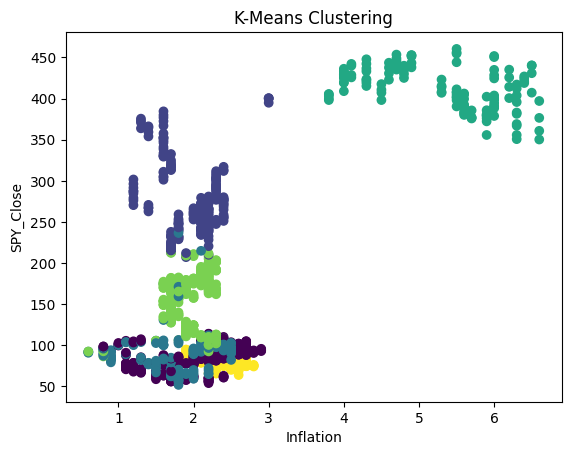

Cluster Centers:
   Inflation    index_sa     Price    SPY Open   SPY Close        Volume
0   1.973026  197.387072  4.278523   83.300395   83.492632  3.346639e+08
1   1.949282  271.930766  1.983608  273.863828  274.711244  3.972825e+08
2   1.757527  194.156183  3.244188   91.121022   90.707849  1.313653e+09
3   5.283206  383.313588  2.879160  412.182748  412.588779  4.079251e+08
4   1.924382  206.313534  2.158428  154.089399  154.415654  5.631515e+08
5   2.400532  143.068138  5.460452   83.467926   83.372766  5.317416e+07


In [14]:

# Visualize the clusters (using 2D scatter plot, adjust as needed)
plt.scatter(final_df['Inflation'], final_df['SPY Close'], c=final_df['cluster'], cmap='viridis')
plt.xlabel('Inflation')
plt.ylabel('SPY_Close')
plt.title('K-Means Clustering')
plt.show()

# Print the cluster centers (centroid values)
print("Cluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_cluster.columns))

In [21]:
import seaborn as sns

correlation_df = final_df.drop(['Date', 'Volume'], axis=1)
correlation_df.corr()
#sns.heatmap(correlation_df)

#high correlation between 

,Inflation,index_sa,Bond % Change,SPY % Change,VIX % Change,Volume % Change,Bond Price,SPY Open,SPY Close,Vix Open,Vix Close
Inflation,1.000000,0.702951,0.041761,0.020380,0.035840,-0.000639,0.040147,0.651025,0.649383,0.058618,0.046489
index_sa,0.702951,1.000000,0.059627,-0.021892,0.012416,-0.018777,-0.446359,0.934535,0.934264,-0.094729,-0.101701
Bond % Change,0.041761,0.059627,1.000000,-0.228518,0.229403,-0.064494,0.017890,0.062886,0.069039,-0.041780,-0.118667
SPY % Change,0.020380,-0.021892,-0.228518,1.000000,-0.701086,0.272127,0.051665,-0.011311,-0.042047,-0.058963,0.223981
VIX % Change,0.035840,0.012416,0.229403,-0.701086,1.000000,-0.326154,0.014289,-0.005233,0.019800,0.145831,-0.198045
Volume % Change,-0.000639,-0.018777,-0.064494,0.272127,-0.326154,1.000000,0.020849,-0.007426,-0.017069,-0.013645,0.099100
Bond Price,0.040147,-0.446359,0.017890,0.051665,0.014289,0.020849,1.000000,-0.510243,-0.511746,0.037786,0.038990
SPY Open,0.651025,0.934535,0.062886,-0.011311,-0.005233,-0.007426,-0.510243,1.000000,0.999261,-0.124068,-0.124817
SPY Close,0.649383,0.934264,0.069039,-0.042047,0.019800,-0.017069,-0.511746,0.999261,1.000000,-0.121680,-0.131784
Vix Open,0.058618,-0.094729,-0.041780,-0.058963,0.145831,-0.013645,0.037786,-0.124068,-0.121680,1.000000,0.930081


In [127]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

numerical_columns = ["Inflation", "index_sa",'Vix Close', "Bond Price", "SPY Open", "SPY Close", 'Volume']

# Create a StandardScaler instance
#scaler = StandardScaler()

# Apply standardization to the numerical columns
#final_df[numerical_columns] = scaler.fit_transform(final_df[numerical_columns])

# Assuming final_df is your DataFrame
features = ['Inflation'	,'index_sa'	,'Bond % Change','VIX % Change','Volume % Change']
target = "SPY % Change"

# Split the data into training and testing sets
train_df, test_df = train_test_split(final_df, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])


In [135]:
# Define the neural network model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(len(features),)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_df[features], train_df[target], epochs=40, batch_size=8, validation_data=(test_df[features], test_df[target]))

Epoch 1/40
130/130 [==============================] - 1s 3ms/step - loss: 3.8364 - val_loss: 2.3685
Epoch 2/40
130/130 [==============================] - 0s 3ms/step - loss: 2.8417 - val_loss: 2.1456
Epoch 3/40
130/130 [==============================] - 0s 2ms/step - loss: 2.7300 - val_loss: 2.1428
Epoch 4/40
130/130 [==============================] - 0s 2ms/step - loss: 2.6760 - val_loss: 2.0369
Epoch 5/40
130/130 [==============================] - 0s 2ms/step - loss: 2.6414 - val_loss: 2.0571
Epoch 6/40
130/130 [==============================] - 0s 2ms/step - loss: 2.6230 - val_loss: 2.0238
Epoch 7/40
130/130 [==============================] - 0s 1ms/step - loss: 2.5884 - val_loss: 2.1122
Epoch 8/40
130/130 [==============================] - 0s 1ms/step - loss: 2.6084 - val_loss: 2.0999
Epoch 9/40
130/130 [==============================] - 0s 1ms/step - loss: 2.5875 - val_loss: 2.1091
Epoch 10/40
130/130 [==============================] - 0s 998us/step - loss: 2.5508 - val_loss: 2.03

In [136]:
# Evaluate the model on the test set
predictions = model.predict(test_df[features])
mse = mean_squared_error(test_df[target], predictions)
print(f"Mean Squared Error on the test set: {mse}")

#"Inflation", "index_sa", 'Vix Close',"Bond Price", 'Volume'
#new_data = [2.7, 440, 25, 4.9, 500000000]

# You can also use the trained model for predictions on new data
#new_data_scaled = scaler.transform(new_data[features])
#new_data_predictions = model.predict(new_data_scaled)

9/9 [==============================] - 0s 2ms/step
Mean Squared Error on the test set: 2.0657378187256112


In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras

In [72]:
features = ["Inflation", "index_sa", 'Vix Close',"Bond Price", 'Volume']
target = "SPY Close"

# Convert 'Change %' to a binary variable (bullish/bearish)
#df[target] = np.where(df[target].str.replace('%', '').astype(float) >= 0, 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df[features], final_df[target], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(features),)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Make predictions
predictions = model.predict(X_test_scaled)

# Convert predictions to binary (0 or 1)
predictions_binary = np.round(predictions).flatten()

# Display classification report
print(classification_report(y_test, predictions_binary))

Epoch 1/10
33/33 [==============================] - 1s 15ms/step - loss: -214.1248 - accuracy: 0.0000e+00 - val_loss: -480.2408 - val_accuracy: 0.0000e+00
Epoch 2/10
33/33 [==============================] - 0s 5ms/step - loss: -812.5051 - accuracy: 0.0000e+00 - val_loss: -1543.5027 - val_accuracy: 0.0000e+00
Epoch 3/10
33/33 [==============================] - 0s 6ms/step - loss: -2276.2039 - accuracy: 0.0000e+00 - val_loss: -3874.6948 - val_accuracy: 0.0000e+00
Epoch 4/10
33/33 [==============================] - 0s 4ms/step - loss: -5315.6147 - accuracy: 0.0000e+00 - val_loss: -8472.9922 - val_accuracy: 0.0000e+00
Epoch 5/10
33/33 [==============================] - 0s 4ms/step - loss: -10883.8604 - accuracy: 0.0000e+00 - val_loss: -16389.6973 - val_accuracy: 0.0000e+00
Epoch 6/10
33/33 [==============================] - 0s 4ms/step - loss: -19965.0586 - accuracy: 0.0000e+00 - val_loss: -28687.3926 - val_accuracy: 0.0000e+00
Epoch 7/10
33/33 [==============================] - 0s 4ms/ste

ValueError: Classification metrics can't handle a mix of continuous and binary targets